In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

data = pd.read_csv("diabetes.csv")

<function matplotlib.pyplot.show(close=None, block=None)>

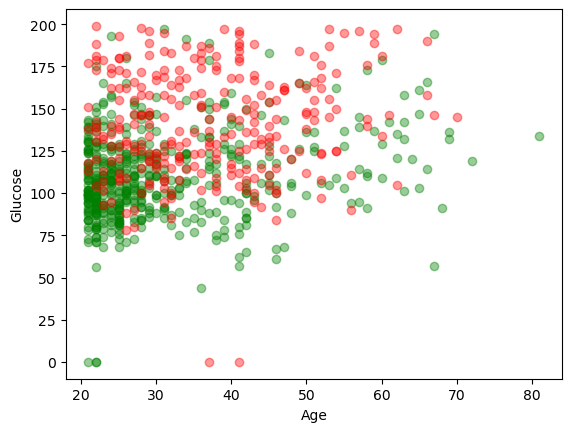

In [11]:
seker_hastalari = data[data.Outcome == 1]
saglikli_insanlar = data[data.Outcome == 0]

# sadece gLoucose'u alarak örnek bir çizim yapalım.

plt.scatter(saglikli_insanlar.Age, saglikli_insanlar.Glucose, color="green", label="Sağlıklı", alpha=0.4)
plt.scatter(seker_hastalari.Age, seker_hastalari.Glucose, color="red", label="Diabet Hastası", alpha=0.4)
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.show

In [12]:
y = data.Outcome.values
x_ham_veri = data.drop(["Outcome"], axis=1) # axis = 1 sütun demektir.

# Normalizasyon yapıyoruz x_ham_veri içerisindeki değerleri sadece 0 ve 1 arasında olacak şekilde hepsini güncelliyoruz
# eğer bu şekilde normalizasyon yapmazsak yüksek rakamlar küçük rakamlar ezer ve knn algoritması yanılabilir
# değerler 0 ile 1 arasına dönüşüyor
# yani hepsini eşit ağırlıklı yaptık.
x = (x_ham_veri - np.min(x_ham_veri, axis=0)) / (np.max(x_ham_veri, axis=0) - np.min(x_ham_veri, axis=0))

# önce
print("Normalizasyon Öncesi Veriler: \n")
print(x_ham_veri.head())
# sonra
print("\n\n\n Normalizasyon sonrası AI'a vereceğimiz veriler: \n")
print(x.head())

Normalizasyon Öncesi Veriler: 

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  



 Normalizasyon sonrası AI'a vereceğimiz veriler: 

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1     0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2     0.470588  0.919598       0.5245

In [42]:
#train datamız ile test datamızı ayırıyoruz
# train datamız sistemin sağlıklı insan ile hasta insanı ayırt etmesini öğrenmek için kullancak
# test datamız ise makine öğrenme modelimiz ne kadar doğru ölçüyor yani hastayı kontrol edebiliyor ona bakıyor

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state=1) # test_size demek %20 sini test için alır --- random_state random olarak seçmemizi belirler

# knn modeli oluşturma
knn = KNeighborsClassifier(n_neighbors = 3) # n_neighbors = k
knn.fit(x_train, y_train) # fit eğit anlamına geliyor ve çalışacağı değerleride veriyoruz yani x_train , y_train
prediction = knn.predict(x_test) # predict ise test et anlamna geliyor ayırdığımız %20 lik kısmı burada test ediyor
print("K=3 için Test Verilerinin antrenman sonucu: ",knn.score(x_test,y_test))

K=3 için Test Verilerinin antrenman sonucu:  0.8311688311688312


In [37]:
# En iyi k değerini bulma fonksiyonu
# K = bakılan komşu

sayac = 1

for k in range(1,11):
    knn_yeni = KNeighborsClassifier(n_neighbors = k)
    knn_yeni.fit(x_train,y_train)
    prediction = knn_yeni.predict(x_test)
    print(sayac," K değeri için çıkan doğruluk oranı %",knn_yeni.score(x_test,y_test)*100)
    sayac += 1

1  K değeri için çıkan doğruluk oranı % 71.42857142857143
2  K değeri için çıkan doğruluk oranı % 71.42857142857143
3  K değeri için çıkan doğruluk oranı % 83.11688311688312
4  K değeri için çıkan doğruluk oranı % 80.51948051948052
5  K değeri için çıkan doğruluk oranı % 81.81818181818183
6  K değeri için çıkan doğruluk oranı % 83.11688311688312
7  K değeri için çıkan doğruluk oranı % 80.51948051948052
8  K değeri için çıkan doğruluk oranı % 80.51948051948052
9  K değeri için çıkan doğruluk oranı % 79.22077922077922
10  K değeri için çıkan doğruluk oranı % 79.22077922077922


In [41]:
# Yeni bir hasta tahmini için:
from sklearn.preprocessing import MinMaxScaler
 
# normalization yapıyoruz - daha hızlı normalization yapabilmek için MinMax  scaler kullandık...
sc = MinMaxScaler()
sc.fit_transform(x_ham_veri)
 
new_prediction = knn.predict(sc.transform(np.array([[6,148,72,35,0,33.6,0.627,50]])))
new_prediction[0]

C:\Users\beek6\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\beek6\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


1